In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
crimedata_df = pd.read_csv("../Crimedata Output/Crime_Data_LA_Use.csv")
crimedata_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code,Crime Code Description,Crime Description Use,Victim Age,Victim Sex,Address,Location,Zip Codes,Date Occurred Year,Date Occurred Month/Year
0,160121647,8/21/2016,8/21/2016,200,Central,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,CRIMINAL THREATS,23,M,ALAMEDA ST,"(34.0545, -118.2378)",90012,2016,8/1/2016
1,160121649,8/21/2016,8/20/2016,1600,Central,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM MOTOR VEHICLE,35,F,4TH ST,"(34.0454, -118.2333)",90013,2016,8/1/2016
2,160121650,8/21/2016,8/21/2016,30,Central,624,BATTERY - SIMPLE ASSAULT,BATTERY ASSAULT,19,M,700 S GRAND AV,"(34.0473, -118.2566)",90017,2016,8/1/2016
3,160121654,8/21/2016,8/21/2016,930,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,INTIMATE PARTNER,30,F,300 E 5TH ST,"(34.0453, -118.2443)",90013,2016,8/1/2016
4,160121655,8/21/2016,8/21/2016,100,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ASSAULT WITH DEADLY WEAPON,42,F,6TH ST,"(34.0438, -118.2416)",90013,2016,8/1/2016


In [18]:
crimedata_df.count()
crimedata_df.dtypes

DR Number                    int64
Date Reported               object
Date Occurred               object
Time Occurred                int64
Area Name                   object
Crime Code                   int64
Crime Code Description      object
Crime Description Use       object
Victim Age                   int64
Victim Sex                  object
Address                     object
Location                    object
Zip Codes                    int64
Date Occurred Year           int64
Date Occurred Month/Year    object
dtype: object

In [28]:
crime_type_group = crimedata_df.groupby("Crime Description Use")
crime_type_count = crime_type_group["Crime Description Use"].count()
crime_type_count

Crime Description Use
0                                       44
ABORTION/ILLEGAL                         2
ARSON                                  903
ASSAULT WITH DEADLY WEAPON           25243
ATTEMPTED ROBBERY                     2917
BATTERY ASSAULT                      46583
BEASTIALITY                              4
BIKE - STOLEN                         5474
BLOCKING DOOR                            2
BOAT - STOLEN                           60
BOMB SCARE                             279
BRANDISH WEAPON                       5444
BRIBERY                                  2
BUNCO THEFT                           4559
BUNCO, ATTEMPT                         279
BURGLARY                             72395
BURGLARY, ATTEMPTED                   2789
CHILD ABANDONMENT                       21
CHILD ABUSE                           2456
CHILD ANNOYING                         929
CHILD NEGLECT                          713
CHILD PORNOGRAPHY                      103
CHILD STEALING                  

In [29]:
#  make the list of crime type count and sort them in descending order
count_list_df=pd.DataFrame(crime_type_count)
count_list=count_list_df.sort_values(by=["Crime Description Use"],ascending=False)
count_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Crime Description Use' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Crime Description Use
Crime Description Use,
BURGLARY,72395
VANDALISM,48911
BATTERY ASSAULT,46583
VEHICLE - STOLEN,41114
INTIMATE PARTNER,34040
THEFT PLAIN,33395
THEFT FROM MOTOR VEHICLE,31876
THEFT OF IDENTITY,27127
ASSAULT WITH DEADLY WEAPON,25243


In [31]:
#max_df = pd.DataFrame(max50)
#max_group_df= max_df.loc["Crime Code Description","THEFT"]

In [12]:
crime_by_area = crimedata_df.groupby("Area Name")
crime_by_area = crime_by_area["Area Name"].count()
crime_by_area

Area Name
77th Street    30792
Central        28759
Devonshire     20935
Foothill       16066
Harbor         27959
Hollenbeck     26689
Hollywood      30444
Mission        21803
N Hollywood    24414
Newton         22724
Northeast      20835
Olympic        21436
Pacific        23796
Rampart        28093
Southeast      23284
Southwest      42363
Topanga        21719
Van Nuys       21187
West LA        18357
West Valley    19326
Wilshire       18879
Name: Area Name, dtype: int64

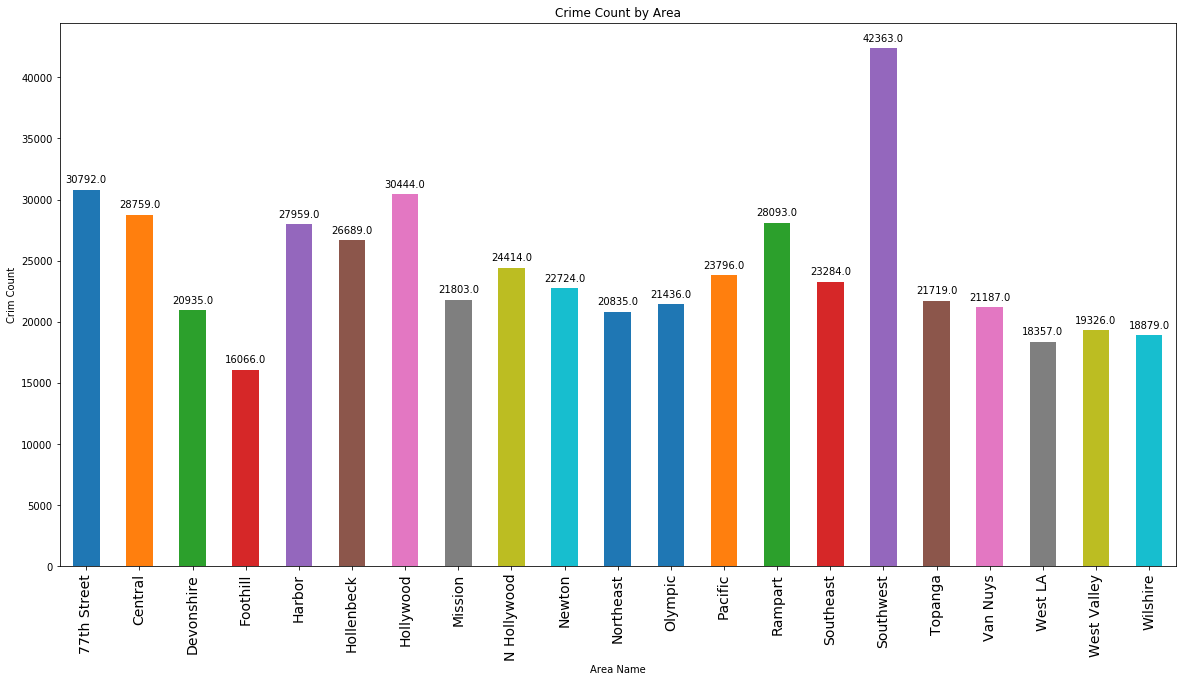

In [42]:
areachart = crime_by_area.plot(kind="bar", align="center")
plt.title("Crime Count by Area")
plt.xlabel("Area Name")
plt.ylabel("Crim Count")

# creating function to add lebels to bar
def add_value_labels(areachart, spacing=5):
   

    # For each bar: Place a label
    for rect in areachart.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        areachart.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(areachart)
plt.savefig("../Crimedata Output/highest_crime_by_area_v2.png")
plt.show()


In [34]:
max10 = count_list[0:10]

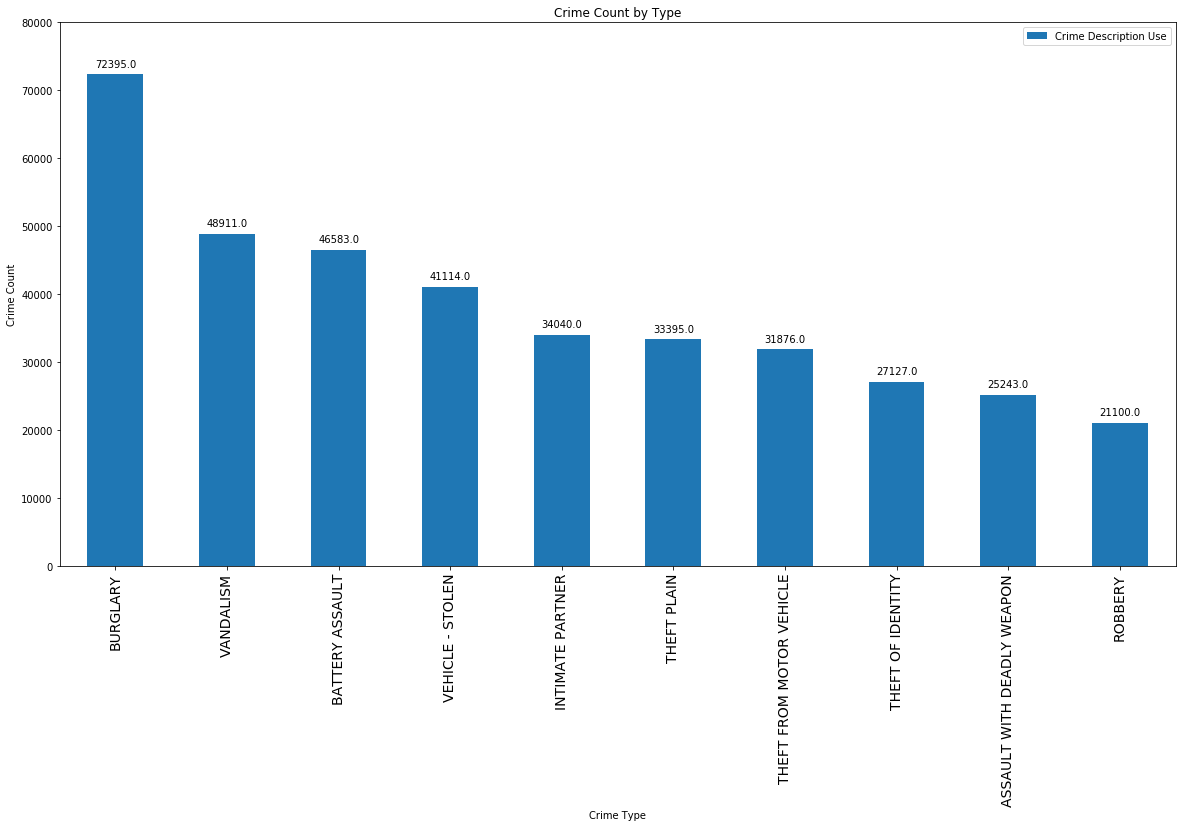

In [40]:
chart = max10.plot(kind="bar", align="center")
plt.ylim(0,80000)
#chart.set_size_inches(20,10)
#plt.figure(figsize=(50,30))
#plt.rcParams["figure.figsize"]=(20,10)
plt.title("Crime Count by Type")
plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.rcParams['xtick.labelsize']=14

plt.xticks(rotation="vertical")
add_value_labels(chart)
plt.savefig("../Crimedata Output/highest_crime_type_v2.png")
plt.show()
